In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [61]:
job="java_developer"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [62]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Pulse Tech Digital,Java/J2EE Developer,Remote,900000.0,"Git, J2EE, MongoDB, Java, OOP",NaN,Java Developer
1,KREATIV WEB SOLUTION,Junior Java Developer.,Hyderābād,550000.0,"CSS, J2EE, Java, SQL, JavaScript",5.0,Java Developer
2,Primejob services,Java Intern,Hyderābād,150000.0,Java,NaN,Java Developer
3,Ai India Innovations,Jr. Java Developer,Remote,2750000.0,"Azure, Software troubleshooting, Big data, Spa...",NaN,Java Developer
4,Giftech Software Solutions,Java Developer,India,0.0,"Java, OOP, Content development, Communication ...",NaN,Java Developer


In [63]:
df.isnull().sum()

company_name              0
job_role                  0
job_location              0
salary_pa                 0
skills                    0
company_rating           51
standardized_job_role     0
dtype: int64

In [64]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [65]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
4,Giftech Software Solutions,Java Developer,India,0.0,"Java, OOP, Content development, Communication ...",NaN,Java Developer
14,Antino Labs,Java Developer Intern,Gurgaon,0.0,"Relational databases, Git, Java, Databases, OOP",3.5,Java Developer
16,PureSoftware Technologies Pvt Ltd,Junior Java Developer,India,0.0,"Data structures, J2EE, Java, OOP, Analysis skills",3.4,Java Developer
21,IntelliSavvy LLC,Java Developer,Remote,0.0,"Node.js, Microsoft SQL Server, J2EE, Java, Dat...",NaN,Java Developer
28,Vertical Software,Java Developer Intern,Pune,0.0,"AJAX, CSS, Bootstrap, Java, JavaScript",4.4,Java Developer
34,Gaian Solutions,Java Developer,Hyderābād,0.0,"Java, SQL, PL/SQL",3.3,Java Developer
45,Veracity Software,Jr Java Developer,India,0.0,"Bootstrap, R, J2EE, Java, Angular",4.1,Java Developer
56,Parahit Technologies,Java Developer,Delhi,0.0,Java,3.7,Java Developer
66,Citta Solutions,JAVA Developer,Remote,0.0,"Relational databases, Test automation, Git, Te...",3.4,Java Developer
70,Tekskills Inc,Java Developer,India,0.0,"Authentication, Kubernetes, Software deploymen...",3.9,Java Developer


### Filling the null values by replacing with average salary of company rating

In [67]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [68]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [69]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Pulse Tech Digital,Java/J2EE Developer,Remote,9.000000,"Git, J2EE, MongoDB, Java, OOP",0.0,Java Developer
1,KREATIV WEB SOLUTION,Junior Java Developer.,Hyderābād,5.500000,"CSS, J2EE, Java, SQL, JavaScript",5.0,Java Developer
2,Primejob services,Java Intern,Hyderābād,1.500000,Java,0.0,Java Developer
3,Ai India Innovations,Jr. Java Developer,Remote,27.500000,"Azure, Software troubleshooting, Big data, Spa...",0.0,Java Developer
4,Giftech Software Solutions,Java Developer,India,7.851489,"Java, OOP, Content development, Communication ...",0.0,Java Developer
...,...,...,...,...,...,...,...
125,CGI,"Security Developer (Java, SAST, DAST)",Bengaluru,6.500000,"Penetration testing, Information security, Jav...",3.8,Java Developer
126,MedRec Technologies,JAVA Developer,Udaipur,4.500000,"Drupal, Oracle, MVC, Gradle, WordPress",3.5,Java Developer
127,Comcast Corporation,Java Development Engineer 4,Chennai,30.000000,"CI/CD, Azure, Software deployment, Writing ski...",3.8,Java Developer
128,AxCipher,Java Technical Lead,India,18.000000,"Jira, FTP, CI/CD, SFTP, Data structures",0.0,Java Developer


In [70]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [71]:
df.describe()

,salary_lpa,company_rating
count,130.000000,130.000000
mean,10.133484,2.359231
std,9.289135,1.945804
min,0.900000,0.000000
25%,5.000000,0.000000
50%,6.940000,3.450000
75%,11.300000,4.000000
max,48.000000,5.000000


In [72]:
df.nunique()

company_name             124
job_role                  54
job_location              21
salary_lpa                44
skills                   124
company_rating            24
standardized_job_role      1
dtype: int64

In [73]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [75]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [76]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                        Skill  Count
3                        java     91
5                         css     25
1                        j2ee     21
0                         git     20
9    software troubleshooting     20
..                        ...    ...
86    database administration      1
87                  debugging      1
88                        jpa      1
90                  websphere      1
115                      sftp      1

[116 rows x 2 columns]


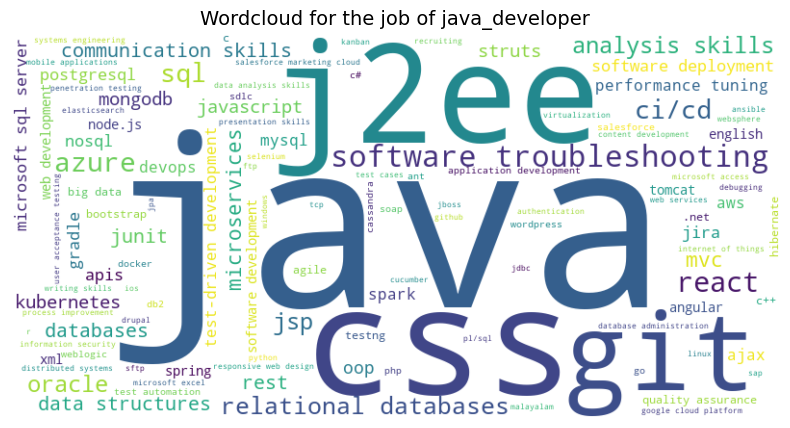

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


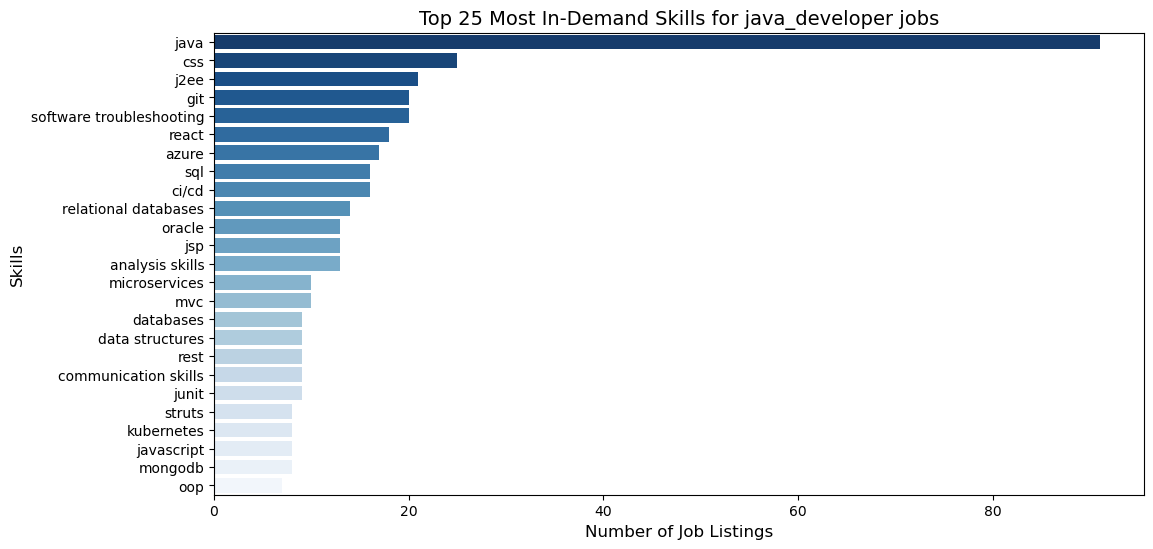

In [78]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [80]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                company_name  salary_lpa
28            Colan Infotech        48.0
98             Tarento Group        48.0
62               LinkedLoops        42.0
54      IFS India Mercantile        42.0
120             [x]cube LABS        36.0
46                  Ericsson        36.0
103  Teliolabs Communication        30.0
29       Comcast Corporation        30.0
123            the LCF group        30.0
9       Ai India Innovations        27.5


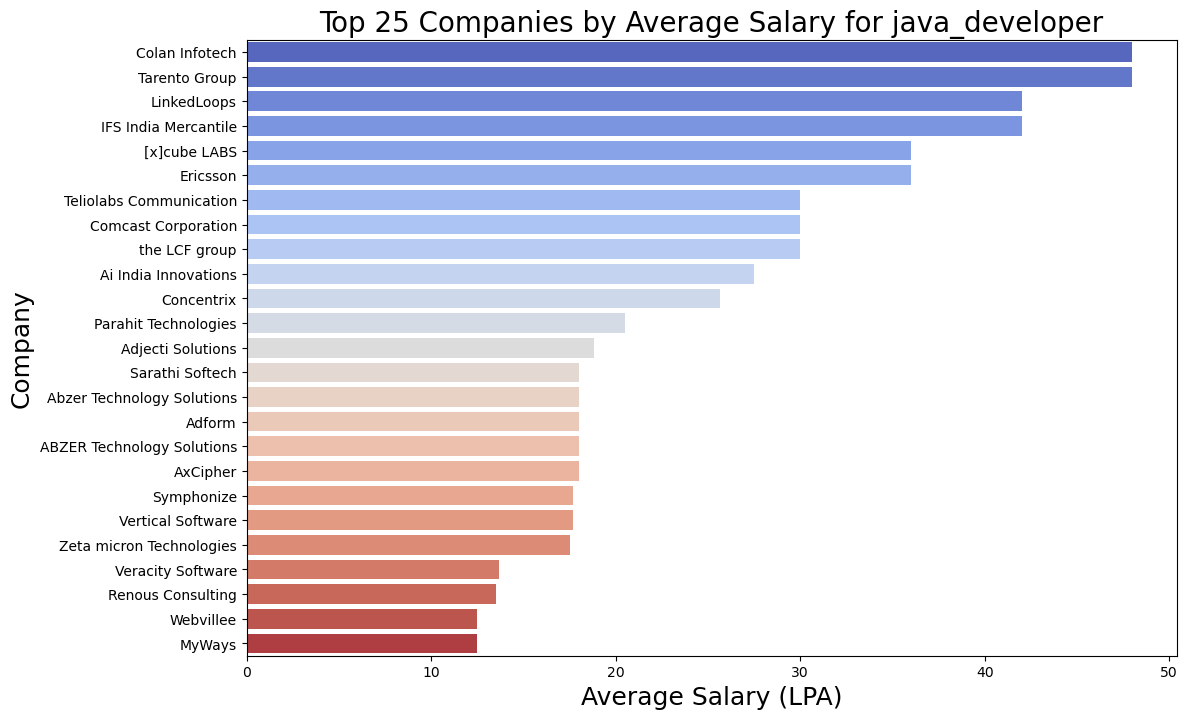

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

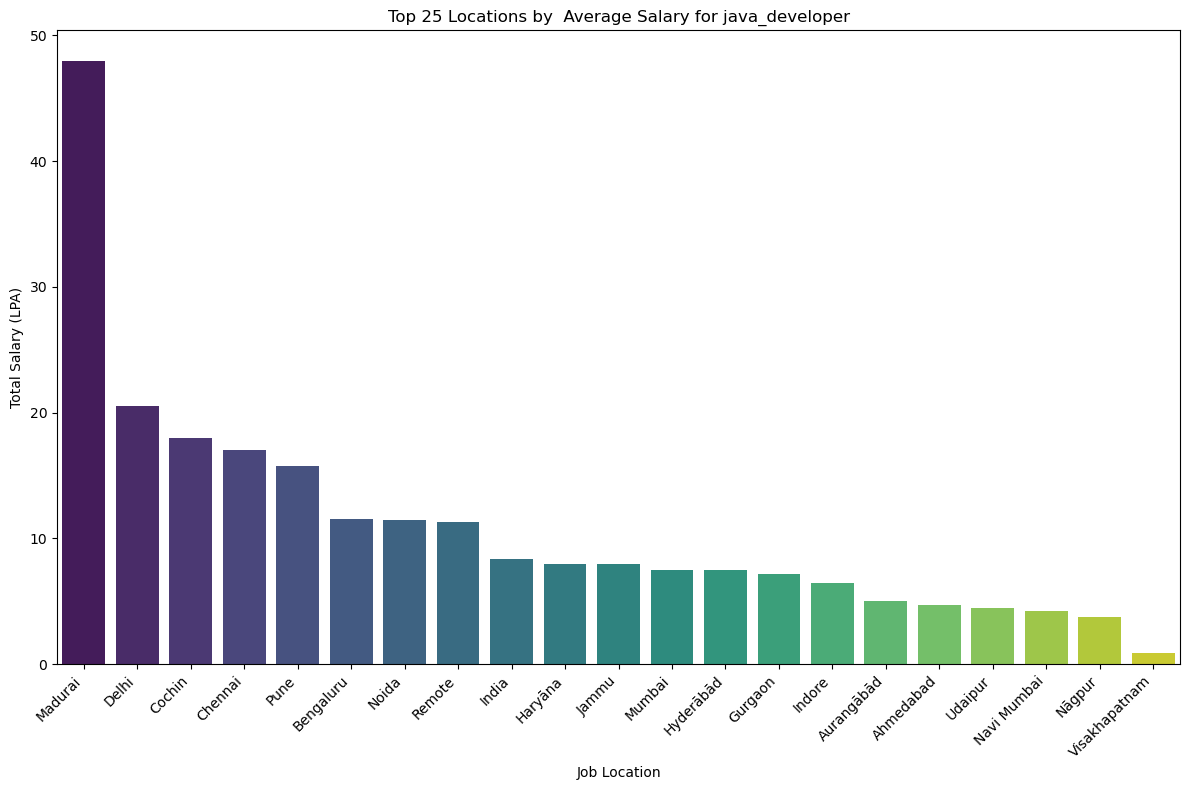

In [83]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

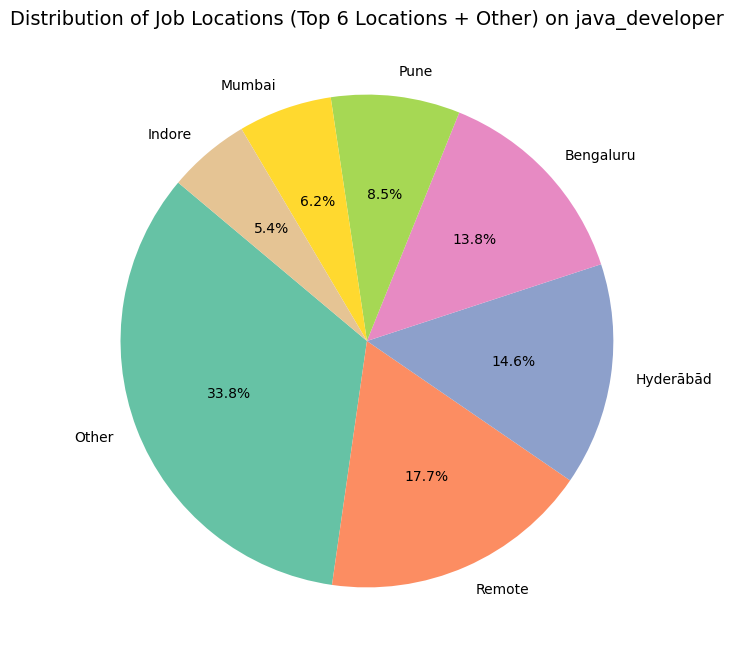

In [84]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

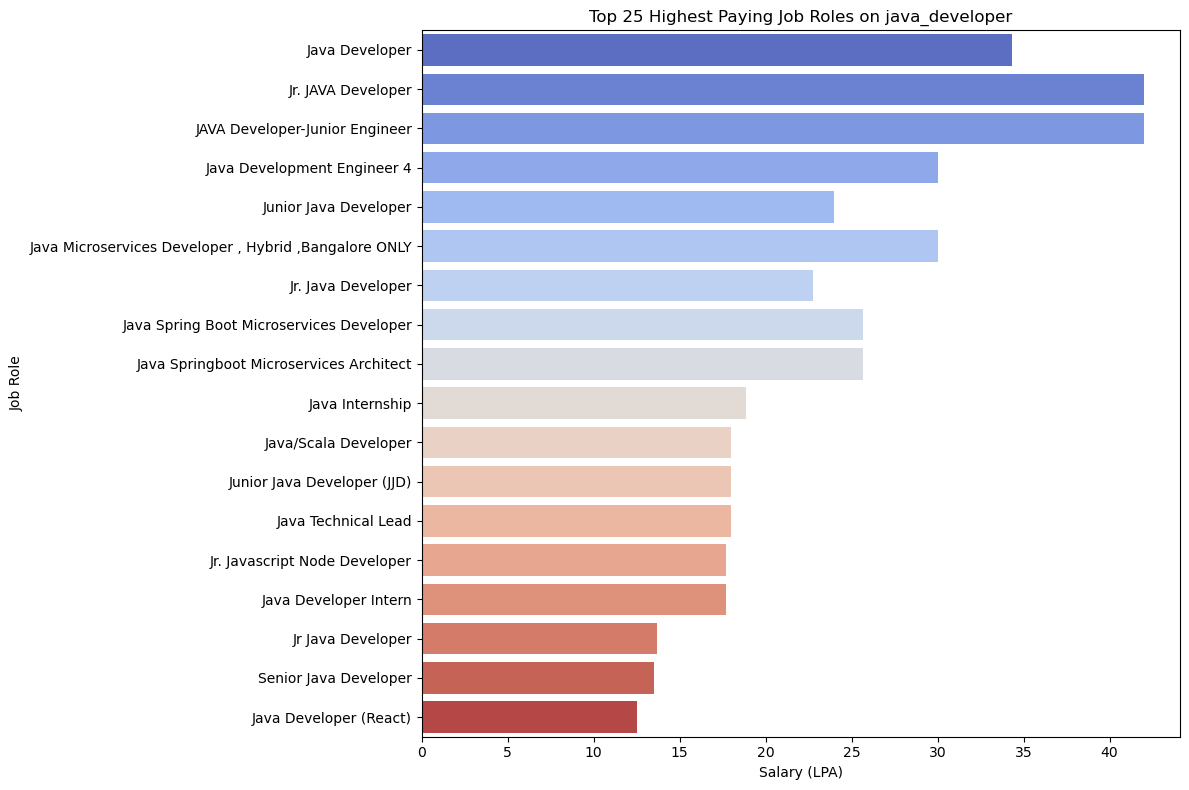

In [86]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [88]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_20112\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


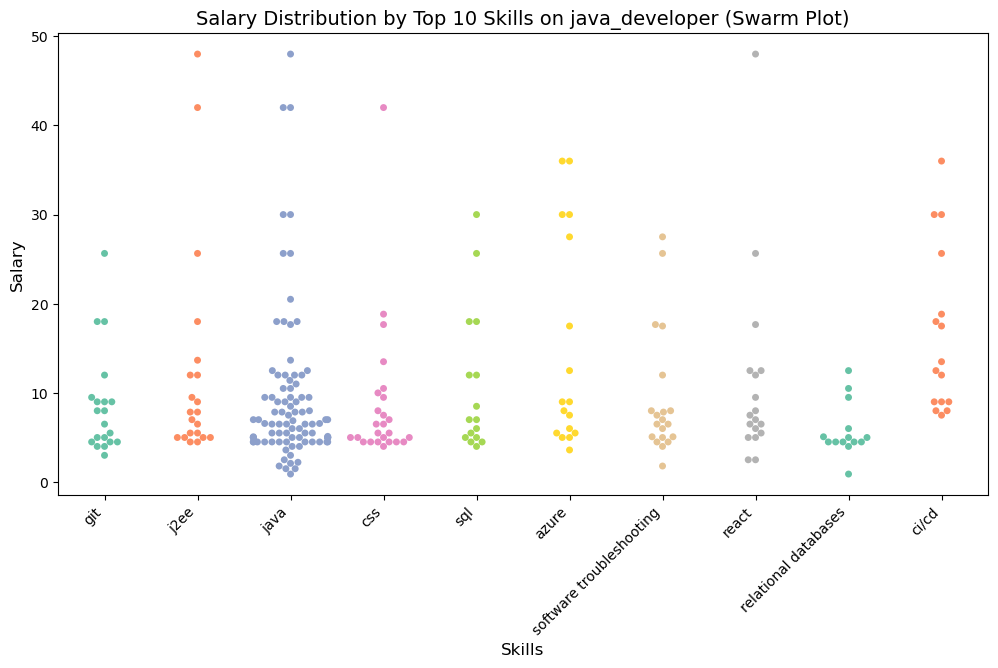

In [89]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

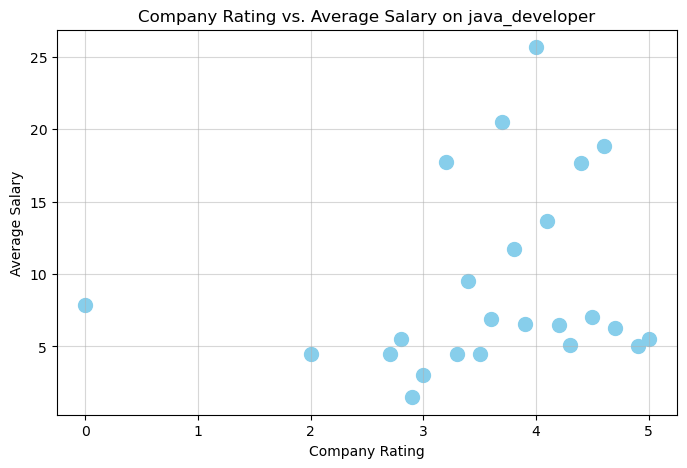

In [91]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [92]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.1775447283097283